# Visualizing Weather Trends in the United States
#### Brooke Moss and Andrew Phillips

### Introduction

##### Cities
Cities we have pulled data for:
- Boston
- New York City
- Chicago
- Denver
- Bismarck, North Dakota
- Detroit
- Anchorage, Alaska
- Minneapolis

### Methodology

##### Functions
We start by importing our helper functions to call from the notebook:
- `compile_CSVs()` will read our saved CSV files into a DataFrame for each city and collect these DataFrames into a dictionary.

- `plot_double_scatter()` takes a DataFrame of weather data for a city, along with 1 element to plot on the x axis and 1-2 elements to plot on the y axis. It can also plot lines of best fit.

- `plot_bar_decade()` plots a sum total of an element by decade. It takes the data, element to track, and date range.

- `plot_in_between()` plots best fit lines for 2 elements and fills the space between these lines.


In addition, there are some notable internal functions:
- `filter_month()` allows one particular month to be plotted over a range of years. It drops all datapoints that are not of the requested month, leaving only the necessary datapoints.

In [1]:
from helpers import compile_CSVs, plot_double_scatter, plot_bar_decade, plot_in_between

##### Gathering Data
When originally gathering the data, we ran the `scrape_data.py` file, which called `get_dataframe()` and utilized **Requests** and **BeautifulSoup** to request the webpage for each city from WikiMedia Commons and read it into a DataFrame. We then used `clean_data()` to clean unnecessary rows, including where the datatables were missing values. It then saved each city's DataFrame into a CSV using `pd.to_csv()`. `clean_data()` also calls `convert_year()` to convert the dates column of the DataFrame into a fractional year values from the current string-based format to ensure that the data is properly spaced on each graph.


##### Compiling Data
Now, we can utilize `compile_CSVs()` to read those CSV files into a dictionary of DataFrames. In this dictionary, the keys are stylized city names (i.e. New York City, Boston, etc) and the values are the DataFrame corresponding to that city.

In [2]:
df_dict = compile_CSVs()

### Results

We start by plotting avg high and avg low temp for every month.

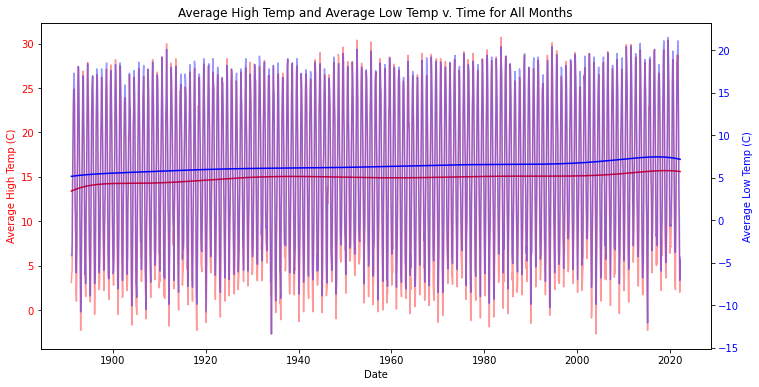

In [3]:
plot_double_scatter(df_dict['Boston'].copy(), 'date', 'avgHighTemp', 'avgLowTemp', \
            fit='both', month_num=0, scatter_type='', fit_degree=8)

Plotting all months, shows us an overall trend, but doesn't mean all that much. So then we filtered to just 1 month

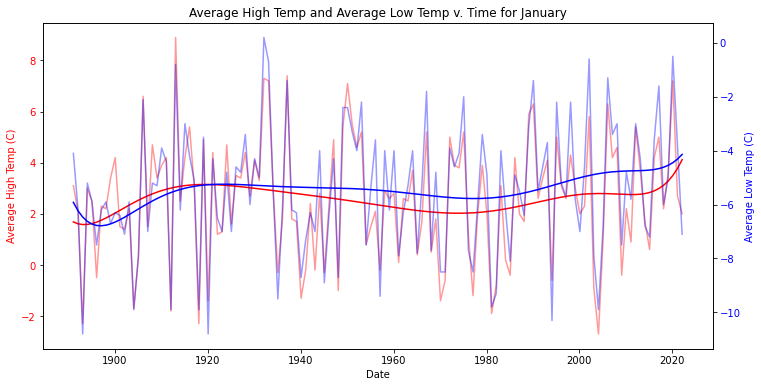

In [4]:
plot_double_scatter(df_dict['Boston'].copy(), 'date', 'avgHighTemp', 'avgLowTemp', \
            fit='both', month_num=1, scatter_type='', fit_degree=8)

This does show a meaningful trend, but we are still curious what the overall trend looks like. To show this, we can graph both trend lines on the same set of axes

It *is* interesting to show these trend lines zeroed at the same place, and show how they both go up

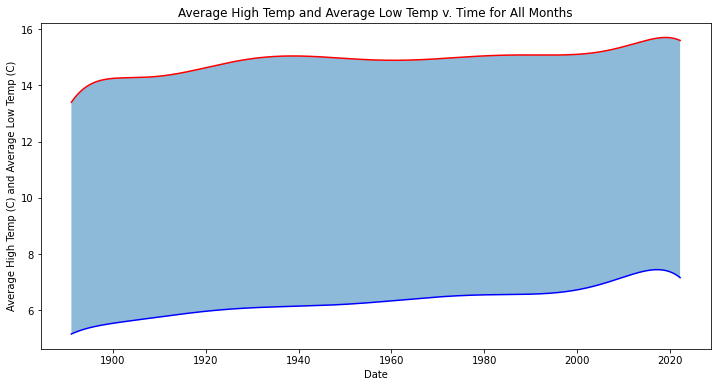

In [8]:
plot_in_between(df_dict['Boston'].copy(), 'date', 'avgHighTemp', 'avgLowTemp', \
            month_num=0, fit_degree=8)

Then we wanna see how temperature correlates with snowfall

Using plot_double_scatter, we plot two values from the table over time, the average high temperature and snowfall for each month. We pass all the variables into the function to create the graph. The resulting graph is shown below, with average high temp graphed in red and snowfall graphed in blue. A linear trendline is included for average high temperature, showing a general increase.

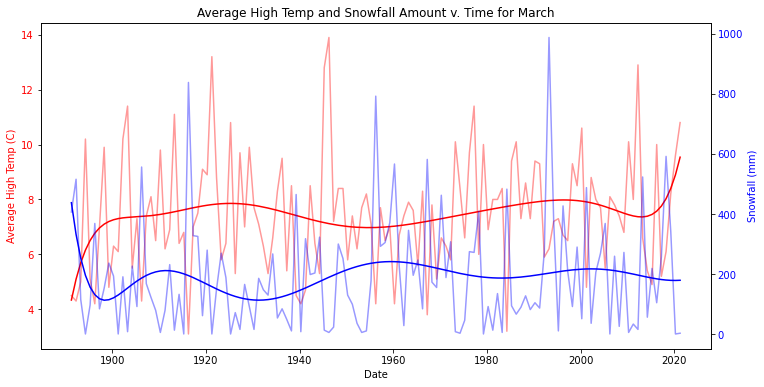

In [9]:
plot_double_scatter(df_dict['Boston'].copy(), 'date', 'avgHighTemp', 'snowfall', \
            fit='both', month_num=3, fit_degree=9)

Two more variables are graphed over time, average high temperature and average low temperature. Linear trendlines are included for both datasets.

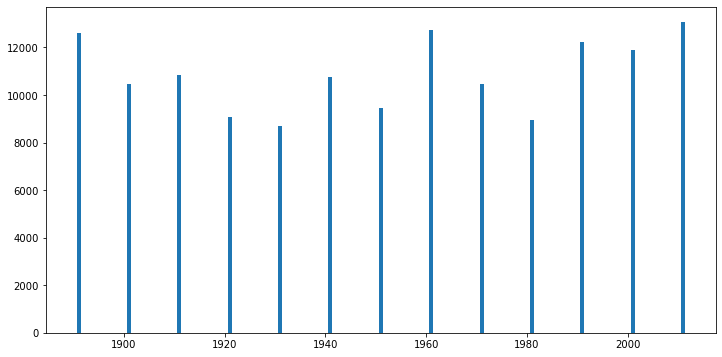

In [7]:
plot_bar_decade(df_dict['Boston'].copy(), [1891, 2021], 'snowfall')